In [301]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import optuna

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
import scipy.stats as stats

In [302]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [303]:
iris = load_iris()

In [304]:
X = iris.data[:, :2]
y = iris.target

In [305]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Câu 1: Thống kê số lượng nhãn trên tập training và tập testing vừa chia. Vẽ biểu đồ phân bố nhãn

In [306]:
train_series = pd.Series(y_train)
test_series = pd.Series(y_test)

In [307]:
mapping = {
    0: 'setosa',
    1: 'Versicolour',
    2: 'Virginica'
}

In [308]:
train_label_distribution = train_series.value_counts()
test_label_distribution  =test_series.value_counts()


train_label_distribution = train_label_distribution.rename(mapping)
test_label_distribution = test_label_distribution.rename(mapping)

print('Training Label Distribution')
print(train_label_distribution)
print('==============================')
print('Testing Label Distribution')
print(test_label_distribution)

Training Label Distribution
Virginica      43
Versicolour    40
setosa         37
Name: count, dtype: int64
Testing Label Distribution
setosa         13
Versicolour    10
Virginica       7
Name: count, dtype: int64


C:\Users\windown\AppData\Local\Temp\ipykernel_13500\2458004481.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train_series, palette="Blues")
C:\Users\windown\AppData\Local\Temp\ipykernel_13500\2458004481.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=test_series, palette="Oranges")


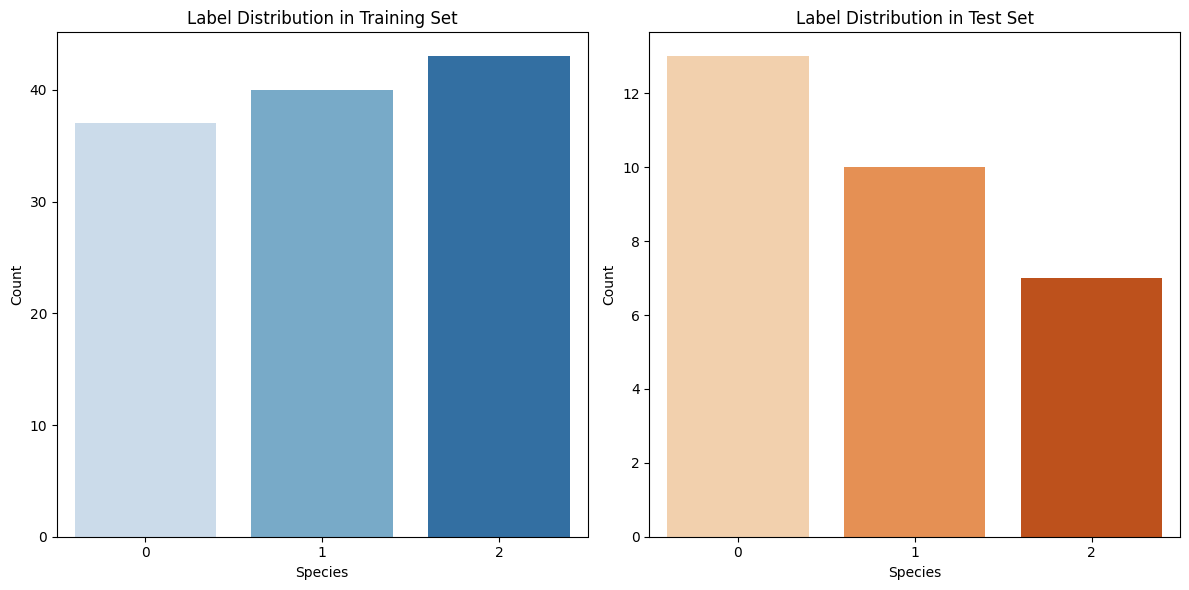

In [309]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  
sns.countplot(x=train_series, palette="Blues")
plt.title('Label Distribution in Training Set')
plt.xlabel('Species')
plt.ylabel('Count')

plt.subplot(1, 2, 2)  
sns.countplot(x=test_series, palette="Oranges")
plt.title('Label Distribution in Test Set')
plt.xlabel('Species')
plt.ylabel('Count')


plt.tight_layout()
plt.show()

# Câu 2: Thực hiện huấn luyện mô hình Logistic Regression trên bộ dữ liệu

In [310]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [311]:
y_pred_lr = lr.predict(X_test)
lr_acc = accuracy_score(y_test, y_pred_lr)
lr_cfmt = confusion_matrix(y_test, y_pred_lr)
print(f'Accuracy Score of Logistic Regression: {lr_acc * 100}')
print(f'Confusion Matrix of Logistic Regression')
print(lr_cfmt)

Accuracy Score of Logistic Regression: 80.0
Confusion Matrix of Logistic Regression
[[13  0  0]
 [ 0  8  2]
 [ 0  4  3]]


# Câu 3: Thực hiện huấn luyện mô hình KNN trên bộ dữ liệu, sau đó so sánh độ chính xác với mô hình Logistic Regression

In [312]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [313]:
y_pred_knn = knn.predict(X_test)
knn_acc = accuracy_score(y_test, y_pred_knn)
knn_cfmt = confusion_matrix(y_test, y_pred_knn)
print(f'Accuracy Score of KNN: {knn_acc * 100}')
print(f'Confusion Matrix of KNN')
print(knn_cfmt)

Accuracy Score of KNN: 83.33333333333334
Confusion Matrix of KNN
[[13  0  0]
 [ 0  9  1]
 [ 0  4  3]]


#### Nhận xét: ***Hai mô hình Logistic Regression và KNN đều cho độ chính xác khá cao, lần lượt là 80%, 83.33%, hai mô hình dự đoán đúng tất cả các nhãn của lớp 0 và đa số dự đoán nhầm ở hai nhãn là 1 và 2***

# Câu 4: Đánh giá 2 mô hình vừa xây dựng trên 3 độ đo precision score, recall score, f1 score sử dụng macro average

In [314]:
report_dict_lr = classification_report(y_test, y_pred_lr, output_dict=True)
report_dict_knn = classification_report(y_test, y_pred_knn, output_dict=True)

lr_macro_avg = report_dict_lr['macro avg']
knn_macro_avg = report_dict_knn['macro avg']

In [315]:
print('Logistic Regression:')
print(f'Precision: {lr_macro_avg['precision']}')
print(f'Recall: {lr_macro_avg['recall']}')
print(f'F1 Score: {lr_macro_avg['f1-score']}')
print('====================')
print('KNN')
print(f'Precision: {knn_macro_avg['precision']}')
print(f'Recall: {knn_macro_avg['recall']}')
print(f'F1 Score: {knn_macro_avg['f1-score']}')


Logistic Regression:
Precision: 0.7555555555555555
Recall: 0.7428571428571429
F1 Score: 0.7424242424242425
KNN
Precision: 0.8141025641025642
Recall: 0.7761904761904761
F1 Score: 0.7760210803689064


#### Nhận xét: ***Các độ đo Precision, Recall, F1-Score của KNN cho kết quả tốt hơn của Logistic Regression***

# Câu 5: Dùng GridSearchCV (hoặc RandomizedSearchCV hoặc Optuna) để tìm bộ tham số tối ưu cho mô hình Logistic Regression, sau đó so sánh kết quả với mô hình gốc

## GridSearchCV

In [316]:
lr_1 = LogisticRegression(max_iter=1000)

param_grid  = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2']
}

grid_search = GridSearchCV(estimator=lr_1, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

In [317]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


c:\Users\windown\PycharmProjects\helloWorld\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             verbose=2)

In [318]:
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best score: {grid_search.best_score_}')

Best parameters: {'C': 1, 'penalty': 'l1', 'solver': 'saga'}
Best score: 0.825


In [319]:
best_model_gd = grid_search.best_estimator_

y_pred = best_model_gd.predict(X_test)
gd_acc = accuracy_score(y_test, y_pred)
print(f'Accuracy score on Test set when applying Grid Search: {gd_acc}')

Accuracy score on Test set when applying Grid Search: 0.8


## RandomizedCV

In [320]:
param_dist = {
    'C': stats.uniform(0.01, 100),
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2']
}

In [321]:
random_search = RandomizedSearchCV(estimator=lr_1, param_distributions=param_dist, n_iter=100, cv=5, verbose=2, n_jobs=-1, random_state=42)

In [322]:
random_search.fit(X_train, y_train)
print(f'Best parameters: {random_search.best_params_}')
print(f'Best score: {random_search.best_score_}')

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters: {'C': 83.25426408004218, 'penalty': 'l2', 'solver': 'saga'}
Best score: 0.825


c:\Users\windown\PycharmProjects\helloWorld\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [323]:
best_model_rd = random_search.best_estimator_

y_pred = best_model_rd.predict(X_test)
rd_acc = accuracy_score(y_test, y_pred)
print(f'Accuracy score on Test set when applying Randomized Search: {rd_acc}')

Accuracy score on Test set when applying Randomized Search: 0.8


## Optuna

In [324]:
def objective(trial):
    C = trial.suggest_float('C', 1e-5, 1e2, log=True)  
    solver = trial.suggest_categorical('solver', ['liblinear', 'saga']) 
    penalty = trial.suggest_categorical('penalty', ['l2', 'l1'])  

    model = LogisticRegression(C=C, solver=solver, penalty=penalty, max_iter=1000)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    return acc

In [325]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2025-05-15 11:08:29,812] A new study created in memory with name: no-name-c74bd03a-2004-4bfb-86d0-5d008c293d79
[I 2025-05-15 11:08:29,821] Trial 0 finished with value: 0.8333333333333334 and parameters: {'C': 33.97469841518564, 'solver': 'liblinear', 'penalty': 'l1'}. Best is trial 0 with value: 0.8333333333333334.
[I 2025-05-15 11:08:29,825] Trial 1 finished with value: 0.23333333333333334 and parameters: {'C': 7.010188096682885e-05, 'solver': 'saga', 'penalty': 'l2'}. Best is trial 0 with value: 0.8333333333333334.
[I 2025-05-15 11:08:29,827] Trial 2 finished with value: 0.7666666666666667 and parameters: {'C': 0.8837781927438776, 'solver': 'liblinear', 'penalty': 'l2'}. Best is trial 0 with value: 0.8333333333333334.
[I 2025-05-15 11:08:29,832] Trial 3 finished with value: 0.8666666666666667 and parameters: {'C': 7.471397303973127, 'solver': 'liblinear', 'penalty': 'l1'}. Best is trial 3 with value: 0.8666666666666667.
[I 2025-05-15 11:08:29,832] Trial 4 finished with value: 0.26

In [326]:
optuna_acc = study.best_value

print(f"Best hyperparameters: {study.best_params}")
print(f"Best accuracy: {study.best_value}")

Best hyperparameters: {'C': 7.471397303973127, 'solver': 'liblinear', 'penalty': 'l1'}
Best accuracy: 0.8666666666666667


In [327]:
df = pd.DataFrame({
    'Method': ['Default Parameters', 'Grid Search', 'Randomized Search', 'Optuna'],
    'Parameters': ['Default', grid_search.best_params_, random_search.best_params_, study.best_params],
    'Accuracy on Test Set': [lr_acc, gd_acc, rd_acc, optuna_acc]
})

df

,Method,Parameters,Accuracy on Test Set
0,Default Parameters,Default,0.800000
1,Grid Search,"{'C': 1, 'penalty': 'l1', 'solver': 'saga'}",0.800000
2,Randomized Search,"{'C': 83.25426408004218, 'penalty': 'l2', 'solver': 'saga'}",0.800000
3,Optuna,"{'C': 7.471397303973127, 'solver': 'liblinear', 'penalty': 'l1'}",0.866667


#### Nhận xét: 
* Độ chính xác trên tập Test của hai chiến lược **Grid Search** và **Randomized Search** bằng với độ chính xác của mô hình với tham số mặc định
* Đối với Optuna, chiến lược này cho độ chính xác tốt nhất với 86.67%

# Câu 6: Thực hiện lại từ câu 1 đến câu 5 cho bộ dữ liệu Breast Cancer Wiscosin

In [328]:
breast_data = pd.read_csv('data.csv')
breast_data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [329]:
breast_data.drop(columns=['id', 'Unnamed: 32'], inplace=True)

In [330]:
mapping = {
    'M': 1,
    'B': 0
}

X = breast_data.drop(columns='diagnosis')
y = breast_data['diagnosis'].map(mapping)

In [331]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Thống kê số lượng nhãn

In [332]:
print('Training Label Distribution')
print(y_train.value_counts())
print('============================')
print('Testing Label Distribution')
print(y_test.value_counts())

Training Label Distribution
diagnosis
0    286
1    169
Name: count, dtype: int64
Testing Label Distribution
diagnosis
0    71
1    43
Name: count, dtype: int64


C:\Users\windown\AppData\Local\Temp\ipykernel_13500\354330756.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette="Blues")
C:\Users\windown\AppData\Local\Temp\ipykernel_13500\354330756.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_test, palette="Oranges")


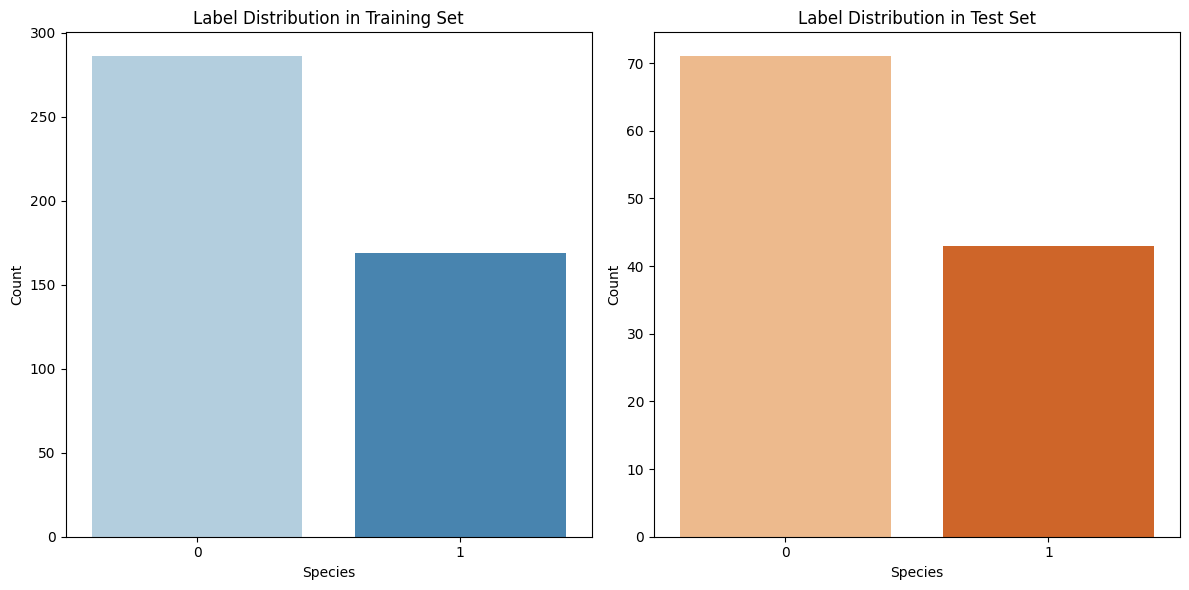

In [333]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  
sns.countplot(x=y_train, palette="Blues")
plt.title('Label Distribution in Training Set')
plt.xlabel('Species')
plt.ylabel('Count')

plt.subplot(1, 2, 2)  
sns.countplot(x=y_test, palette="Oranges")
plt.title('Label Distribution in Test Set')
plt.xlabel('Species')
plt.ylabel('Count')


plt.tight_layout()
plt.show()

## Thực hiện huấn luyện trên mô hình Logistic Regression

In [334]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

c:\Users\windown\PycharmProjects\helloWorld\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [335]:
y_pred_lr = lr.predict(X_test)
lr_acc = accuracy_score(y_test, y_pred_lr)

print(f'Accuracy score of Logistic Regression: {lr_acc * 100}')

Accuracy score of Logistic Regression: 93.85964912280701


## Thực hiện huấn luyện mô hình KNN

In [336]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [337]:
y_pred_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)

print(f'Accuracy score of KNN: {acc_knn * 100}')

Accuracy score of KNN: 90.35087719298247


#### Nhận xét:
* Đối với dữ liệu mà nhãn có hai lớp như bộ dữ liệu Breast Cancer, mô hình Logistic Regression thể hiện khả năng phân loại tốt hơn KNN với độ chính xác lần lượt là 93.85% và 90.35%

## Đánh giá 2 mô hình trên 3 độ đo sử dụng macro average

In [338]:
report_dict_lr = classification_report(y_test, y_pred_lr, output_dict=True)
report_dict_knn = classification_report(y_test, y_pred_knn, output_dict=True)

lr_macro_avg = report_dict_lr['macro avg']
knn_macro_avg = report_dict_knn['macro avg']

In [339]:
print('Logistic Regression:')
print(f'Precision: {lr_macro_avg['precision']}')
print(f'Recall: {lr_macro_avg['recall']}')
print(f'F1 Score: {lr_macro_avg['f1-score']}')
print('====================')
print('KNN')
print(f'Precision: {knn_macro_avg['precision']}')
print(f'Recall: {knn_macro_avg['recall']}')
print(f'F1 Score: {knn_macro_avg['f1-score']}')


Logistic Regression:
Precision: 0.9412162162162162
Recall: 0.9277759580740256
F1 Score: 0.933693394266722
KNN
Precision: 0.8988095238095237
Recall: 0.895021290533901
F1 Score: 0.8968325791855204


##### Nhận xét:
* Ngược lại với bộ dữ liệu iris, ở bộ dữ liệu này, thông số về Precision, Recall và F1 score của Logistic Regression hoàn toàn tốt hơn của KNN

## GridSearchCV

In [340]:
lr_1 = LogisticRegression(max_iter=1000)

param_grid  = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2']
}

grid_search = GridSearchCV(estimator=lr_1, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

In [341]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             verbose=2)

In [342]:
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best score: {grid_search.best_score_}')

Best parameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best score: 0.9692307692307691


In [343]:
best_model_gd = grid_search.best_estimator_

y_pred = best_model_gd.predict(X_test)
gd_acc = accuracy_score(y_test, y_pred)
print(f'Accuracy Score on Test set when apply Grid Search: {gd_acc}')

Accuracy Score on Test set when apply Grid Search: 0.956140350877193


## RandomizedCV

In [344]:
param_dist = {
    'C': stats.uniform(0.01, 100),
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2']
}

In [345]:
random_search = RandomizedSearchCV(estimator=lr_1, param_distributions=param_dist, n_iter=100, cv=5, verbose=2, n_jobs=-1, random_state=42)

In [346]:
random_search.fit(X_train, y_train)
print(f'Best parameters: {random_search.best_params_}')
print(f'Best score: {random_search.best_score_}')

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters: {'C': 29.224464853521816, 'penalty': 'l2', 'solver': 'liblinear'}
Best score: 0.9714285714285715


In [347]:
best_model_rd = random_search.best_estimator_

y_pred = best_model_rd.predict(X_test)
rd_acc = accuracy_score(y_test, y_pred)
print(f'Accuracy Score on Test set when applying Randomized Search: {rd_acc}')

Accuracy Score on Test set when applying Randomized Search: 0.9298245614035088


## Optuna

In [348]:
def objective(trial):
    C = trial.suggest_float('C', 1e-5, 1e2, log=True)  
    solver = trial.suggest_categorical('solver', ['liblinear', 'saga']) 
    penalty = trial.suggest_categorical('penalty', ['l2', 'l1'])  

    model = LogisticRegression(C=C, solver=solver, penalty=penalty, max_iter=1000)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    return acc

In [349]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2025-05-15 11:09:13,195] A new study created in memory with name: no-name-e40c4964-b0f6-44ae-b69b-8baf1e8e2092
c:\Users\windown\PycharmProjects\helloWorld\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[I 2025-05-15 11:09:13,416] Trial 0 finished with value: 0.9210526315789473 and parameters: {'C': 21.739221071885986, 'solver': 'saga', 'penalty': 'l2'}. Best is trial 0 with value: 0.9210526315789473.
c:\Users\windown\PycharmProjects\helloWorld\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[I 2025-05-15 11:09:13,712] Trial 1 finished with value: 0.9210526315789473 and parameters: {'C': 0.024241274275034582, 'solver': 'saga', 'penalty': 'l2'}. Best is trial 0 with value: 0.9210526315789473.
[I 2025-05-15 11:09:13,712] Trial 2 finished with value: 0.622807017543859

In [350]:
optuna_acc = study.best_value

print(f"Best hyperparameters: {study.best_params}")
print(f"Best accuracy: {study.best_value}")

Best hyperparameters: {'C': 44.1441603710418, 'solver': 'liblinear', 'penalty': 'l1'}
Best accuracy: 0.9649122807017544


In [351]:
df = pd.DataFrame({
    'Method': ['Default Parameters', 'Grid Search', 'Randomized Search', 'Optuna'],
    'Parameters': ['Default', grid_search.best_params_, random_search.best_params_, study.best_params],
    'Accuracy on Test Set': [lr_acc, gd_acc, rd_acc, optuna_acc]
})

df

,Method,Parameters,Accuracy on Test Set
0,Default Parameters,Default,0.938596
1,Grid Search,"{'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}",0.956140
2,Randomized Search,"{'C': 29.224464853521816, 'penalty': 'l2', 'solver': 'liblinear'}",0.929825
3,Optuna,"{'C': 44.1441603710418, 'solver': 'liblinear', 'penalty': 'l1'}",0.964912


##### Nhận xét:
* Từ bảng trên ta thấy được rằng, chỉ có chiến lược Randomized Search cho độ chính xác thấp hơn so với mô hình có các tham số mặc định, còn lại với Grid Search và Optuna thì các tham số tìm được giúp cho mô hình có độ chính xác cao hơn so với mô hình mặc định